# Here we will analyze the game data

### Preparing Data

In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [110]:
# reading data file
df = pd.read_csv('./games.csv')

In [111]:
# checking data
display(df.head(), df.shape, df.columns)
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


(16715, 11)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [112]:
# setting columns names to lower case
df.columns = [name for name in df.columns.str.lower()]

In [113]:
# checking for duplicates
display(df.duplicated().sum())

0

---

In [114]:
# checking for missing values ​​in name and gender column at the same time
display(df['name'].isna().sum())
display(df[df['name'].isna()].head())
display(df['genre'].isna().sum())
display(df[df['genre'].isna()].head())

# dropping rows with missing values in name and genre columns
df.dropna(subset=['name', 'genre'], inplace=True)

2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


We removed the 2 lines with missing values ​​in name and genre, they seem to be 2 isolated cases that will not hinder our analysis.

---

In [115]:
# checking for missing values and year == 0 on year_of_release column
display("Before:")
display(f"Games missing the year of release: {df['year_of_release'].isna().sum()}")
display(f"Games with the year of release 0: {df[df['year_of_release'] == 0]['year_of_release'].count()}")

# filling missimg vales whth the year of the same game in another platform or 0 if not found
df['year_of_release'] = df.groupby('name')['year_of_release'].transform(lambda x: x.fillna(x.mode()[0])
                                                                        if not x.mode().empty else 0)

# checking if can convert year column to int
if np.array_equal(df['year_of_release'], df['year_of_release'].astype(int)):
    df['year_of_release'] = df['year_of_release'].astype(int)

# checking for missing values and year == 0 on year_of_release column again
display("After:")
display(f"After: Games missing the year of release: {df['year_of_release'].isna().sum()}")
display(f"Games with the year of release 0: {df[df['year_of_release'] == 0]['year_of_release'].count()}")

'Before:'

'Games missing the year of release: 269'

'Games with the year of release 0: 0'

'After:'

'After: Games missing the year of release: 0'

'Games with the year of release 0: 146'

We don't know the reason for the missing values ​​but we'll fill them with 0 when we can't find the same game on any other platform to get the year so we can know when 0 it was missing.

---

In [116]:
# checking for missing values on critic_score column
display(df['critic_score'].isna().sum())

# filling missing values with -1
df['critic_score'] = df['critic_score'].fillna(-1)

# checking if can convert critic_score column to int
if np.array_equal(df['critic_score'], df['critic_score'].astype(int)):
    df['critic_score'] = df['critic_score'].astype(int)

# checking for missing values on critic_score column
display(df['critic_score'].isna().sum())

8576

0

We don't know the reason for the missing values, but we'll fill them with -1, since 0 could be a grade that could easily be confused with real data.

---

In [117]:
# checking for missing values on user_score column
display(df['user_score'].isna().sum())

# filling missing values with -1
df['user_score'] = df['user_score'].fillna(-1)
# replacing 'tbd' with -2
df['user_score'] = df['user_score'].replace('tbd', -2)

# checking if can convert user_score column to float
df['user_score'] = df['user_score'].astype(float)

# checking for missing values on user_score column
display(df['user_score'].isna().sum())

6699

0

We don't know the reason for the missing values, but we'll fill them with -1, since 0 could be a grade that could easily be confused with real data and we will fill 'tdb' with -2.

---

In [118]:
# filling missing values on rating column
df['rating'] = df['rating'].fillna('RP')

Filling missing rating values ​​with RP (Rating Pending)

---

Making a column with the total of sales for each game

In [119]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

---
### Starting the analysis

Let's see the distribution of games released each year in our data

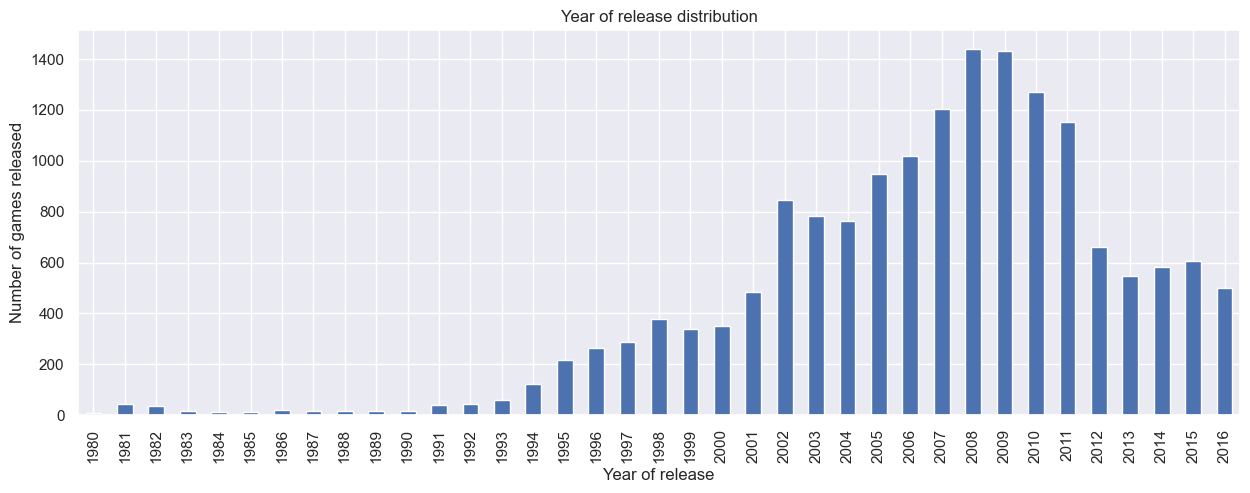

In [120]:

df[df['year_of_release'] != 0]['year_of_release'].value_counts().sort_index().plot(kind='bar',
                                                       figsize=(15, 5),
                                                       title='Year of release distribution',
                                                       xlabel='Year of release',
                                                       ylabel='Number of games released')
plt.show()

We can see that there was a peak between 2008 and 2009 but then the number of launches fell again.

---

In [121]:
# checking platforms with the highest total sales
platforms_top10_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index.tolist()
display(platforms_top10_sales)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

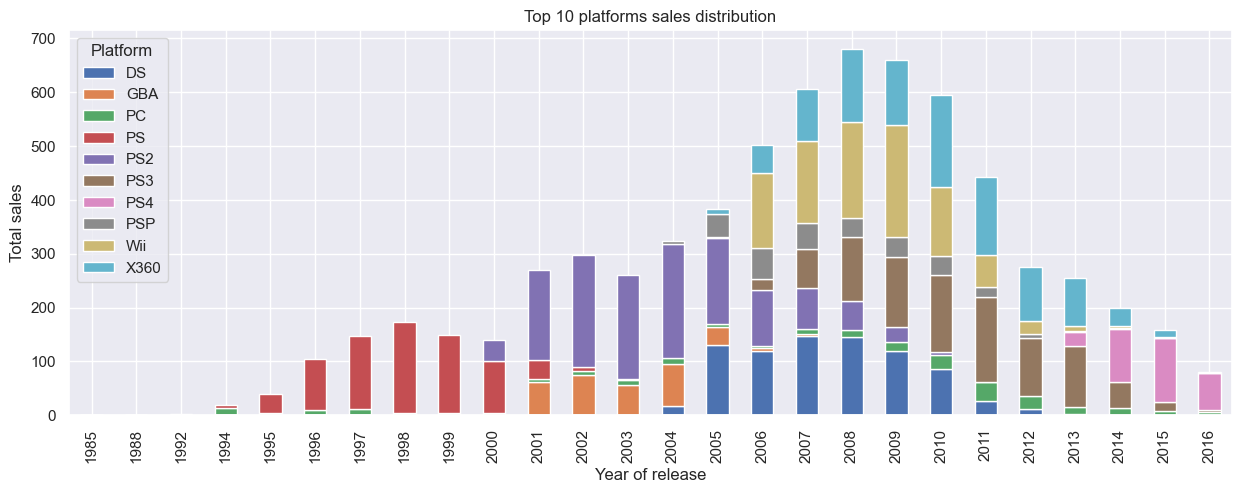

In [122]:
# showing sales distribution of top 10 platforms over the years
df.query('platform in @platforms_top10_sales and year_of_release != 0').groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().plot(
    kind='bar',
    figsize=(15, 5),
    title='Top 10 platforms sales distribution',
    xlabel='Year of release',
    ylabel='Total sales',
    stacked=True)
plt.legend(title='Platform', loc='upper left')
plt.show()

We can see that PlayStation versions of games peaked in sales for about 4 to 6 years after their release and lost sales immediately after a new version of the platform was released, making sales of the old version almost non-existent after 2 years. We also see that sales of video games increased with the new platforms, XBox 360, DS and Wii between 2006 and 2010 as a wave, but after that PlayStation games regained their status as a near monopoly. Furthermore, sales of video games declined significantly after this wave, factors such as subscription sales model, digital platforms and global financial situation can be considered for this.

---

Since we are talking about technology and a relatively young and immediate audience, we will use data from the most recent 5 years to plan for the next year.

In [123]:
df_recent_released = df.query('year_of_release in [2012, 2013, 2014, 2015, 2016]').reset_index(drop=True)

In [124]:
# checking the top platforms with the highest total sales in recent years
top_5 = df_recent_released.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index.tolist()[:5]

---

Let's check which platforms had the most sales in the last 5 years

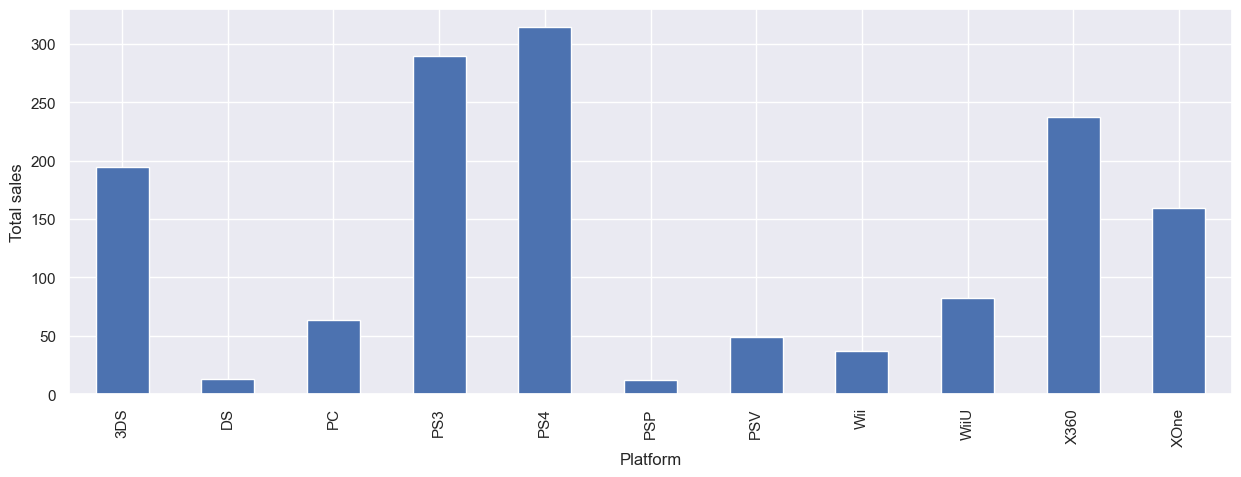

In [125]:
df_recent_released.groupby('platform')['total_sales'].sum().plot(
    kind='bar',
    x='platform',
    figsize=(15, 5),
    legend=False,
    xlabel='Platform',
    ylabel='Total sales')
plt.show()

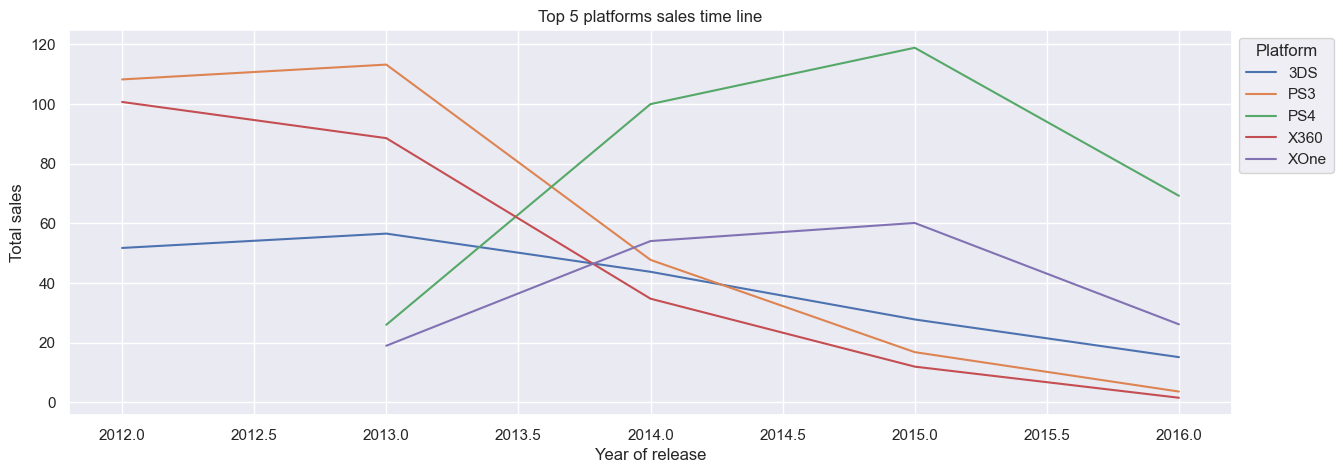

In [126]:
df_recent_released.query('platform in @top_5').groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().plot(
    kind='line',
    figsize=(15, 5),
    title='Top 5 platforms sales time line',
    xlabel='Year of release',
    ylabel='Total sales')
plt.legend(title='Platform', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

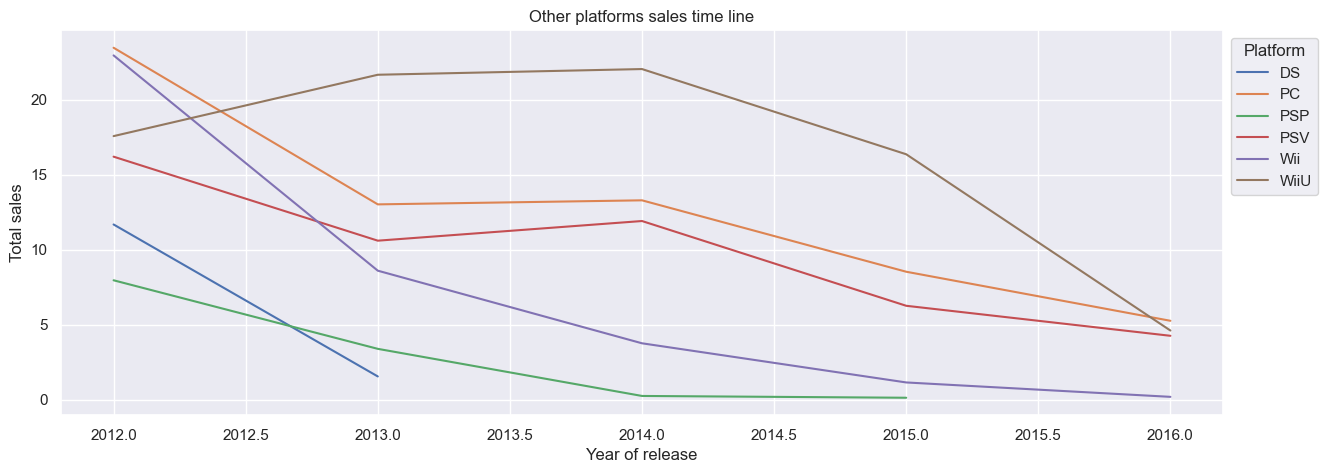

In [127]:
df_recent_released.query('platform not in @top_5').groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().plot(
    kind='line',
    figsize=(15, 5),
    title='Other platforms sales time line',
    xlabel='Year of release',
    ylabel='Total sales')
plt.legend(title='Platform', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In the graphs generated we could observe that throughout the period games from the PS3 and PS4 platforms led in sales followed by X360, 3DS and xOne, and observing their behavior over the years we noticed that game sales on all platforms are falling and in the last year we had PS4 in the lead, followed by xOne, 3DS, PS3 and X360, game sales on the other platforms have very low values ​​in the last year.

---

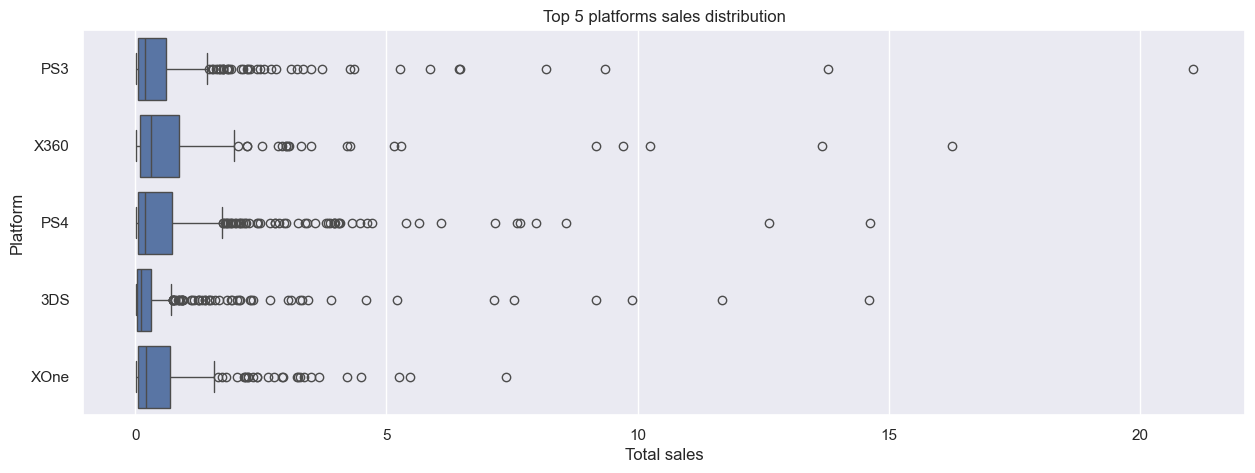

In [128]:
sns.set_theme(rc={'figure.figsize':(15, 5)})
sns.boxplot(data=df_recent_released.query('platform in @top_5'), y='platform', x='total_sales')
plt.title('Top 5 platforms sales distribution')
plt.xlabel('Total sales')
plt.ylabel('Platform')
plt.show()

In this box plot we can't extract much useful information, but we can see that there are several outliers.

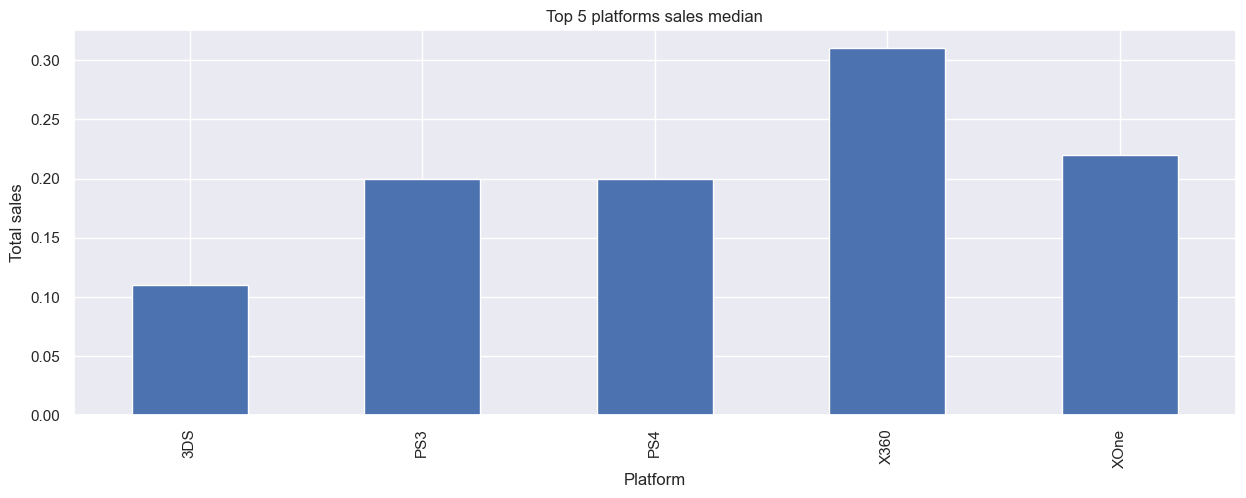

In [129]:
df_recent_released.query('platform in @top_5').groupby('platform')['total_sales'].median().reset_index().plot(
    kind='bar',
    x='platform',
    figsize=(15, 5),
    legend=False,
    title='Top 5 platforms sales median',
    xlabel='Platform',
    ylabel='Total sales')
plt.show()

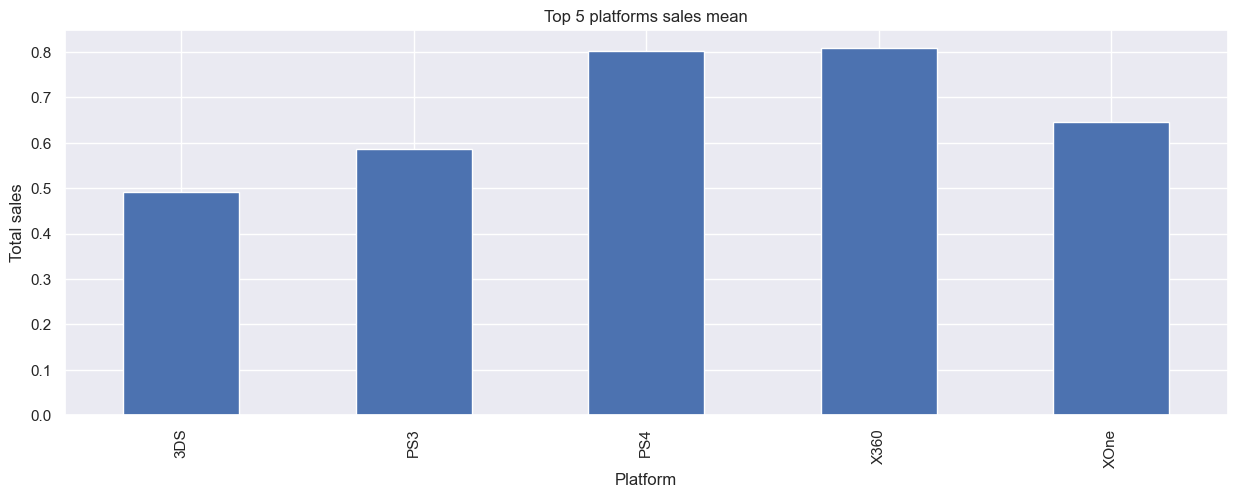

In [130]:
df_recent_released.query('platform in @top_5').groupby('platform')['total_sales'].mean().reset_index().plot(
    kind='bar',
    x='platform',
    figsize=(15, 5),
    legend=False,
    title='Top 5 platforms sales mean',
    xlabel='Platform',
    ylabel='Total sales')
plt.show()

The differences in sales are quite significant, and the platform averages diverge from the medians due to the large number of outliers. Overall, we notice that sales of games for the Xbox 360 are much more significant than they initially seemed. We can assume that a few very successful games lead to this discrepancy between the values ​​and their medians.

---

In [131]:
# filtering the top platform with the highest total sales in recent years
df_recent_released_top_seler_platform = df_recent_released.query('platform == @top_5[0]')

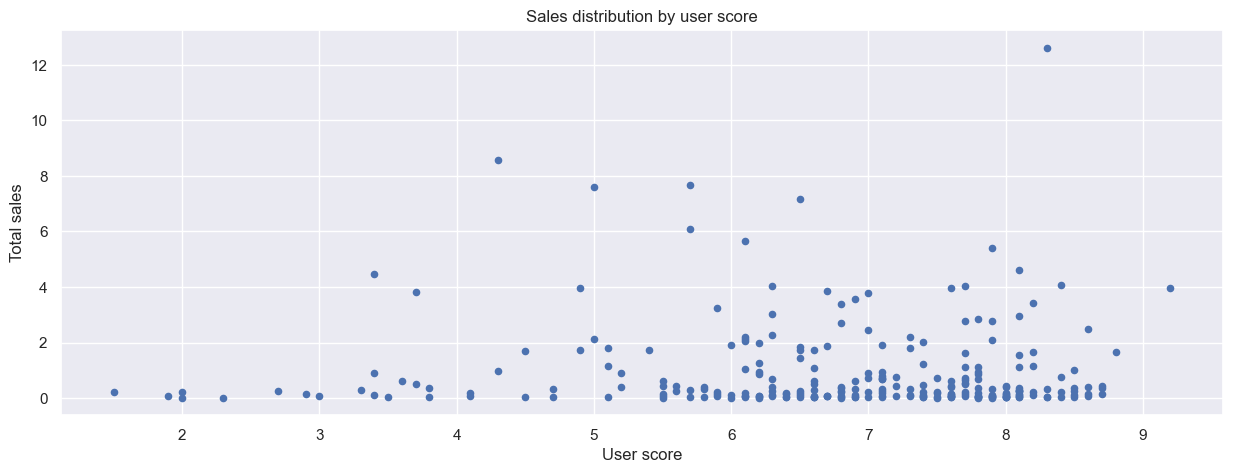

-0.031957110204556376

In [132]:
# plotting the sales distribution by User score
df_recent_released_top_seler_platform.query('user_score >= 0').plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    figsize=(15, 5),
    title='Sales distribution by user score',
    xlabel='User score',
    ylabel='Total sales')
plt.show()

# showing the correlation between user score and total sales
display(df_recent_released_top_seler_platform.query('user_score >= 0')['user_score'].corr(df_recent_released_top_seler_platform['total_sales']))

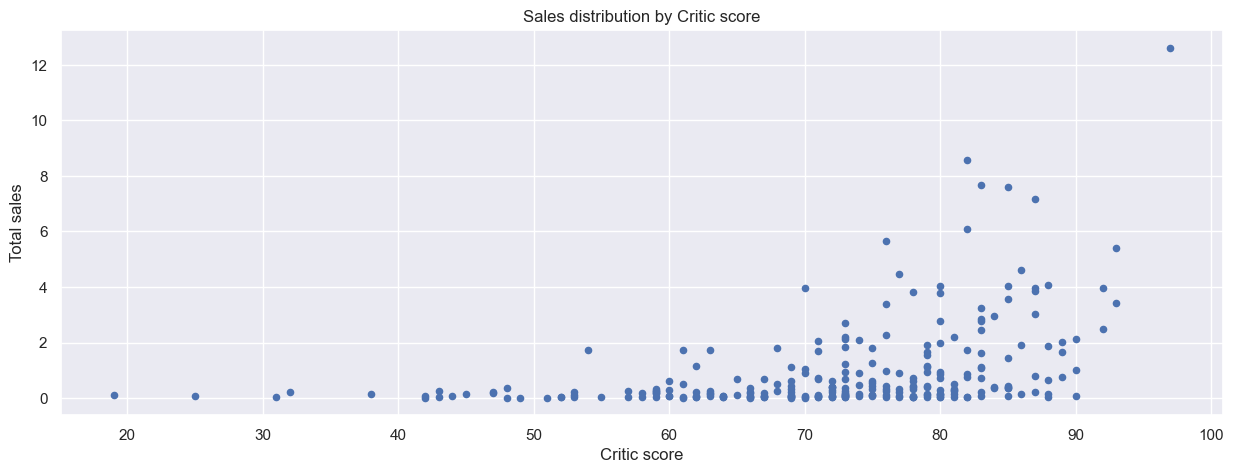

0.40656790206178095

In [133]:
# plotting the sales distribution by Critic score
df_recent_released_top_seler_platform.query('critic_score >= 0').plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    figsize=(15, 5),
    title='Sales distribution by Critic score',
    xlabel='Critic score',
    ylabel='Total sales')

plt.show()

# showing the correlation between critic score and total sales
display(df_recent_released_top_seler_platform.query('critic_score >= 0')['critic_score'].corr(df_recent_released_top_seler_platform['total_sales']))

Professional reviews have a greater correlation with sales than user reviews; user reviews can be negative in the case of the PS4, for example.

---

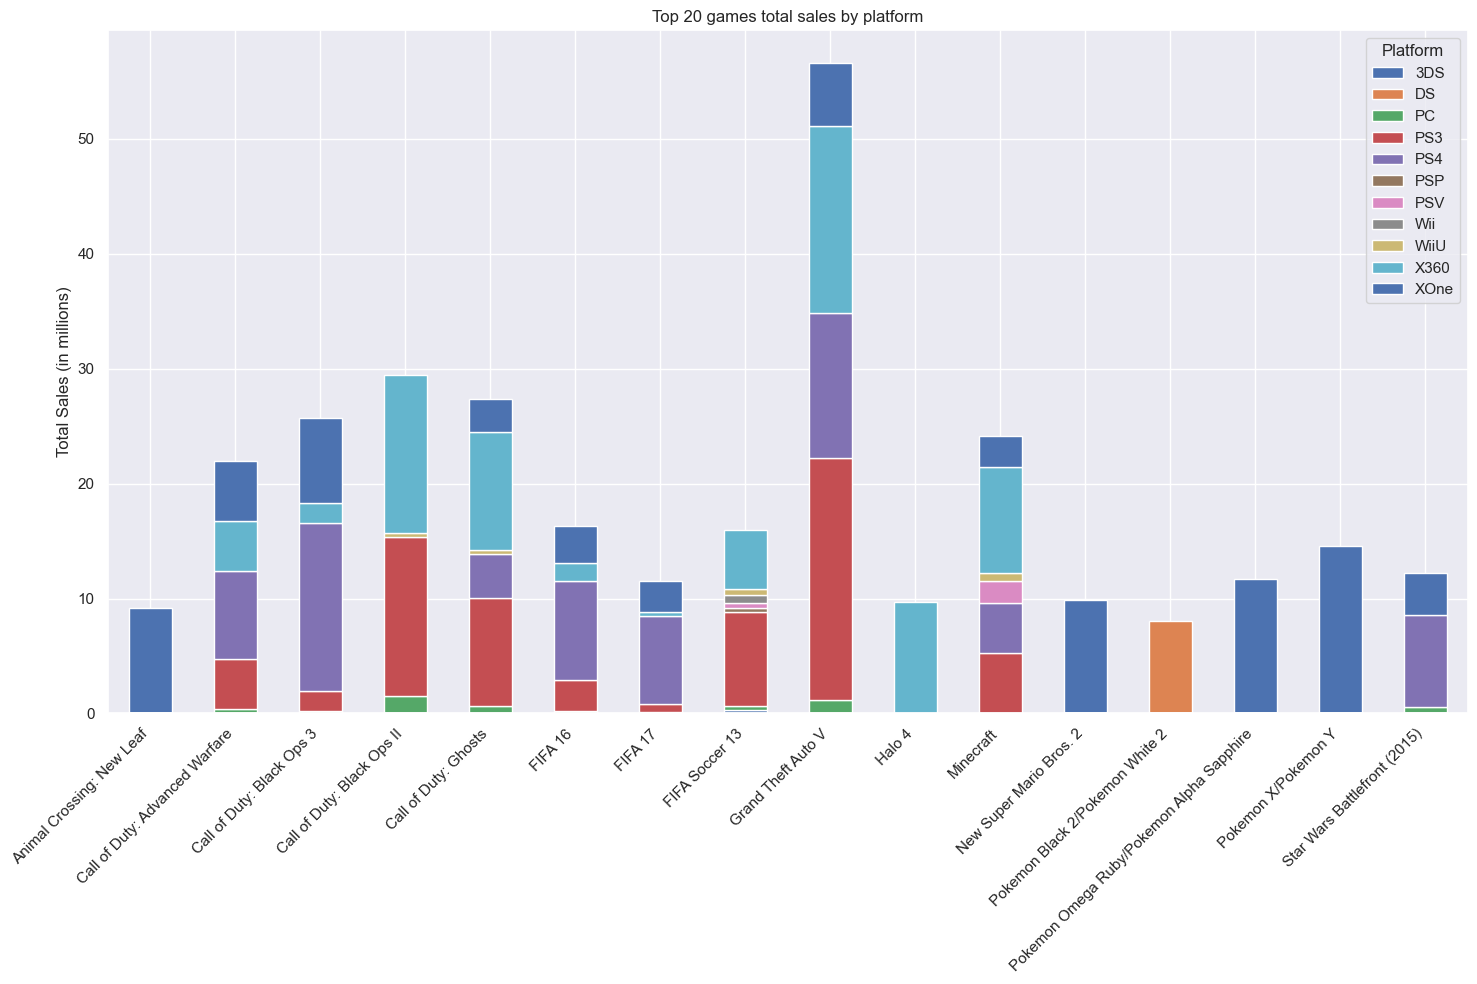

In [134]:
# listing names of top 20 best selers games
top_seler_games_names = df_recent_released[['name', 'total_sales']].sort_values(by='total_sales', ascending=False).head(20).name.tolist()

# creating a new dataframe with the games in the list
df_games_to_compare = df_recent_released.query('name in @top_seler_games_names')

# grouping by name and platform, summing the total sales and unstacking to create a pivot table to plot
df_games_to_compare.groupby(['name', 'platform'])['total_sales'].sum().unstack().fillna(0).plot(
    kind='bar',
    stacked=True,
    figsize=(15, 10),
    title='Top 20 games total sales by platform'
    )
plt.ylabel('Total Sales (in millions)')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

We selected the top 20 best-selling games from 2012 to 2016 and stacked them in total sales by platform in a bar graph, so we can see how sales behaved on each platform for the same game.

---

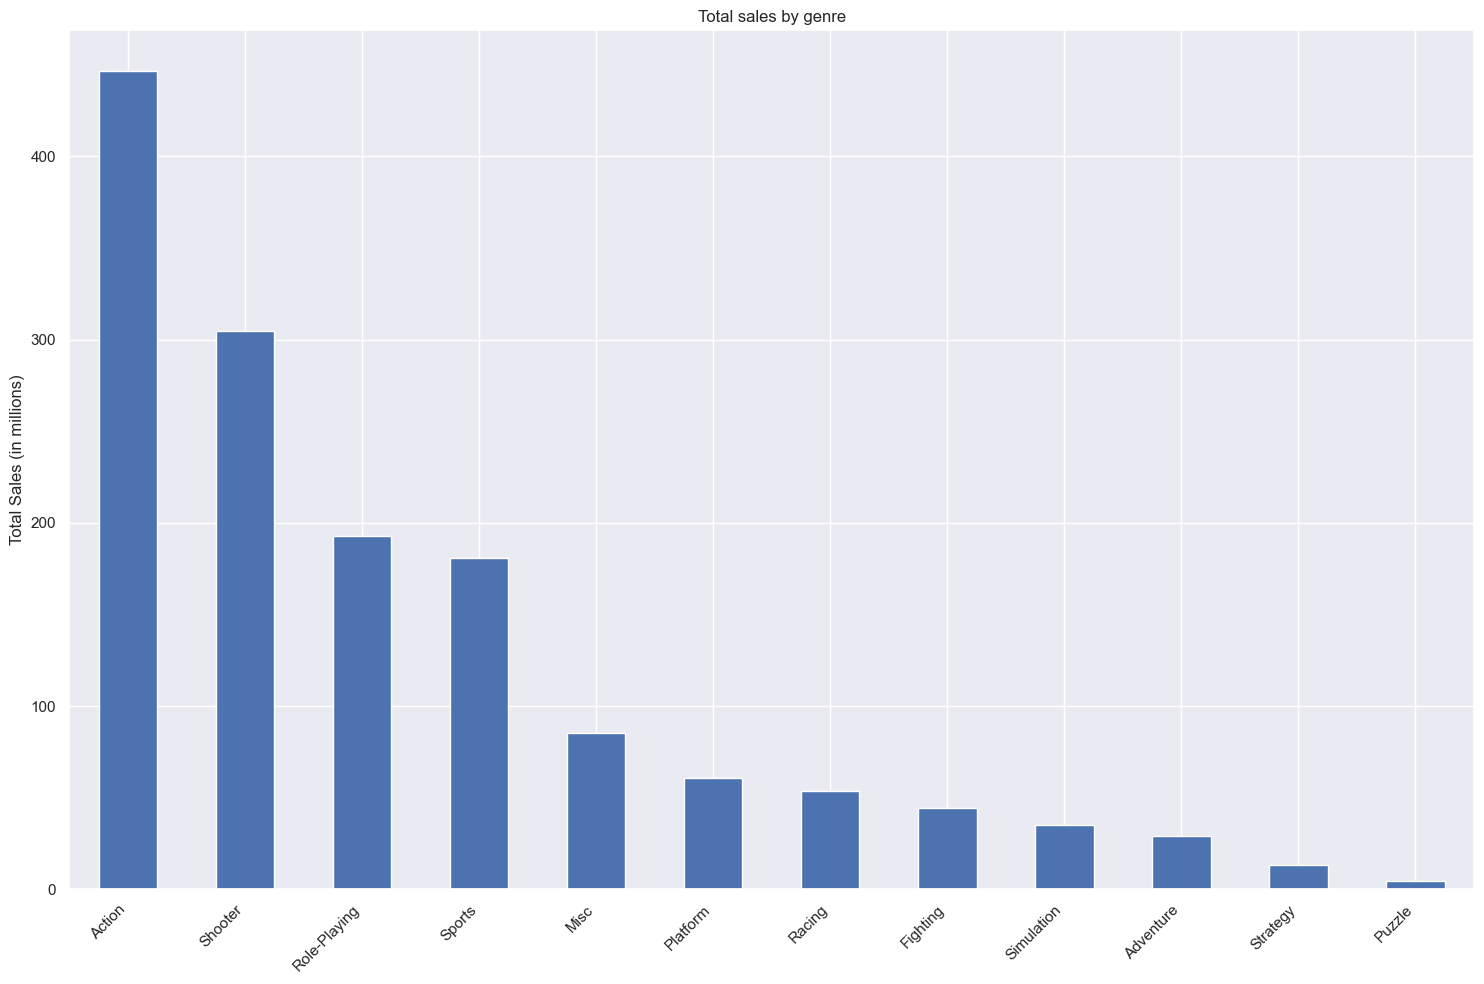

In [135]:
df_recent_released.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(15, 10),
    title='Total sales by genre'
    )
plt.ylabel('Total Sales (in millions)')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

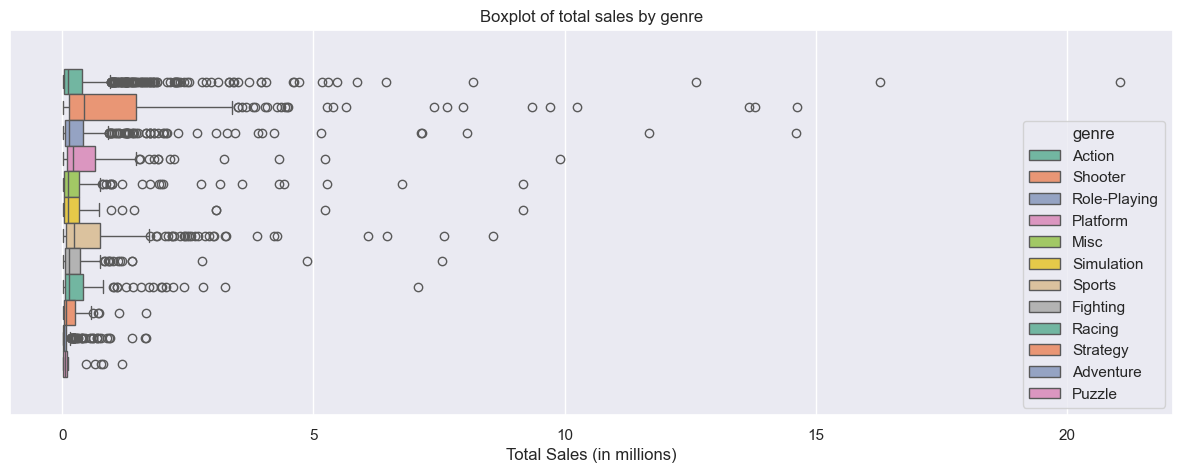

In [136]:
sns.set_theme(rc={'figure.figsize':(15, 5)})
sns.boxplot(data=df_recent_released, x='total_sales', hue='genre', palette='Set2')
plt.title('Boxplot of total sales by genre')
plt.xlabel('Total Sales (in millions)')
plt.show()

In absolute sales values ​​by genre, we observe a difference with the distribution, which was already expected due to some isolated cases of great success of some games in relation to the majority. The most profitable genres would be Shooter, Platform, Sports, RP and Action, and we cannot generalize, because as already observed, some outliers are taking the absolute sales values ​​to the heights, but we know that this is not a pattern when we look at the distribution.

---

### Region profile

In [137]:
# checking the top 5 platforms with the highest sales in North America
na_top5_platforms = df_recent_released.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5].reset_index()

# checking the total sales in North America
na_total_sales = df_recent_released['na_sales'].sum()

# calculating the market share of each top 5 platforms in North America
na_top5_platforms['market_share'] = (na_top5_platforms['na_sales'] / na_total_sales * 100).round(2).astype(str) + '%'

display(na_top5_platforms)

,platform,na_sales,market_share
0,X360,140.57,23.69%
1,PS4,108.74,18.33%
2,PS3,103.74,17.49%
3,XOne,93.12,15.7%
4,3DS,55.49,9.35%


In [138]:
# checking the top 5 platforms with the highest sales in Europe
eu_top5_platforms = df_recent_released.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5].reset_index()

# checking the total sales in Europe
eu_total_sales = df_recent_released['eu_sales'].sum()

# calculating the market share of each top 5 platforms in Europe
eu_top5_platforms['market_share'] = (eu_top5_platforms['eu_sales'] / eu_total_sales * 100).round(2).astype(str) + '%'

display(eu_top5_platforms)

,platform,eu_sales,market_share
0,PS4,141.09,27.71%
1,PS3,107.27,21.07%
2,X360,74.89,14.71%
3,XOne,51.59,10.13%
4,3DS,42.83,8.41%


In [139]:
# checking the top 5 platforms with the highest sales in North America
jp_top5_platforms = df_recent_released.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5].reset_index()

# checking the total sales in North America
jp_total_sales = df_recent_released['jp_sales'].sum()

# calculating the market share of each top 5 platforms in North America
jp_top5_platforms['market_share'] = (jp_top5_platforms['jp_sales'] / jp_total_sales * 100).round(2).astype(str) + '%'

display(jp_top5_platforms)

,platform,jp_sales,market_share
0,3DS,87.79,45.53%
1,PS3,35.29,18.3%
2,PSV,21.04,10.91%
3,PS4,15.96,8.28%
4,WiiU,13.01,6.75%


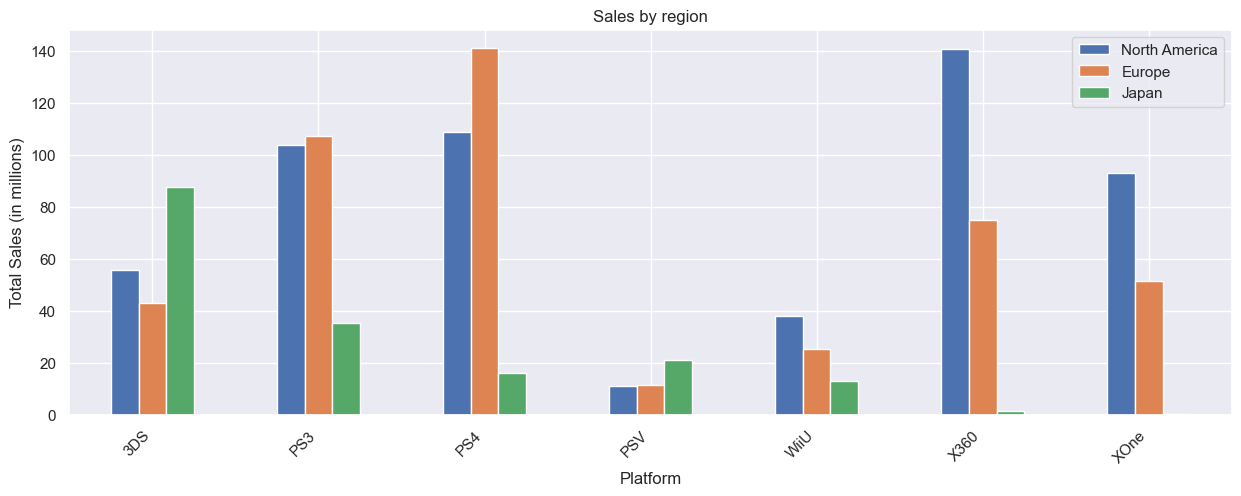

In [140]:
# creatinh a new dataframe with the relevant information and plotting the sales by region
na_top5_platforms[['platform', 'na_sales']].merge(
    eu_top5_platforms[['platform', 'eu_sales']],
    on='platform',
    how='outer'
).merge(
    jp_top5_platforms[['platform', 'jp_sales']],
    on='platform',
    how='outer'
).merge(
    df_recent_released.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum(),
    on='platform',
    how='left',
).drop(columns=['na_sales_x', 'eu_sales_x', 'jp_sales_x']).rename(
    columns={
        'na_sales_y': 'North America',
        'eu_sales_y': 'Europe',
        'jp_sales_y': 'Japan'
    }
).set_index('platform').plot(
    kind='bar',
    title='Sales by region'
    )
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Platform')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

We calculated the market share for the main platforms in the 3 regions and were able to observe the differences in favorite platforms for each of them. And with the graph we can compare the regions.

---

In [141]:
# checking the top 5 genres with the highest sales in North America and creating a new dataframe
df_top5_genres_regions_profiles = df_recent_released.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5].reset_index()

In [142]:
# checking the top 5 genres with the highest sales in Europe and merging with the previous dataframe
df_top5_genres_regions_profiles = df_top5_genres_regions_profiles.merge(
    df_recent_released.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5],
    on='genre',
    how='outer'
)

In [143]:
# checking the top 5 genres with the highest sales in Japan and merging with the previous dataframe
df_top5_genres_regions_profiles = df_top5_genres_regions_profiles.merge(
    df_recent_released.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5],
    on='genre',
    how='outer'
)

In [144]:
# merging the previous dataframe to get NaNs
df_top5_genres_regions_profiles = df_top5_genres_regions_profiles.merge(
    df_recent_released.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum(),
    on='genre',
    how='left'
).drop(columns=['na_sales_x', 'eu_sales_x', 'jp_sales_x']).rename(
    columns={
        'na_sales_y': 'North America',
        'eu_sales_y': 'Europe',
        'jp_sales_y': 'Japan'
    }
)

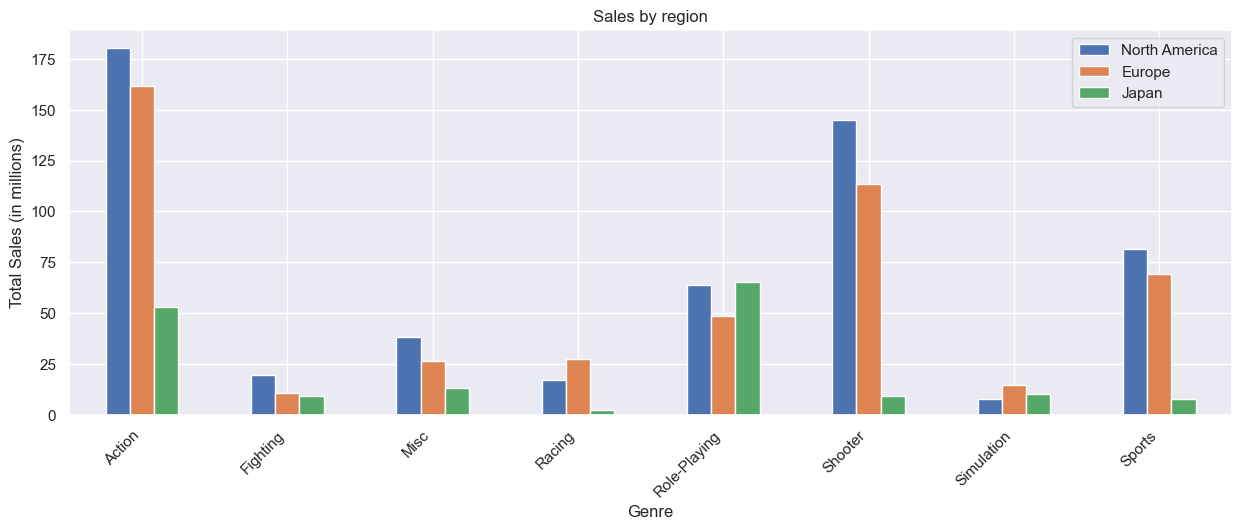

In [145]:
# plotting the sales distribution by region by genre
df_top5_genres_regions_profiles.set_index('genre').plot(
    kind='bar',
    title='Sales by region'
    )
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Genre')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

North America and Europe follow very similar genre preferences, while Japan has a very distinct preference.

---

In [146]:
# creating a new dataframe with the sales of the North America sales by rating
df_rating_regions_profiles = df_recent_released.groupby('rating')['na_sales'].sum().reset_index().rename(columns={'na_sales': 'North America'})

In [147]:
# merging the previous dataframe with the sales of the Europe sales by rating
df_rating_regions_profiles = df_rating_regions_profiles.merge(
    df_recent_released.groupby('rating')['eu_sales'].sum(),
    on='rating',
    how='outer'
).rename(columns={'eu_sales': 'Europe'})

In [148]:
# merging the previous dataframe with the sales of the Japan sales by rating
df_rating_regions_profiles = df_rating_regions_profiles.merge(
    df_recent_released.groupby('rating')['jp_sales'].sum(),
    on='rating',
    how='outer'
).rename(columns={'jp_sales': 'Japan'})

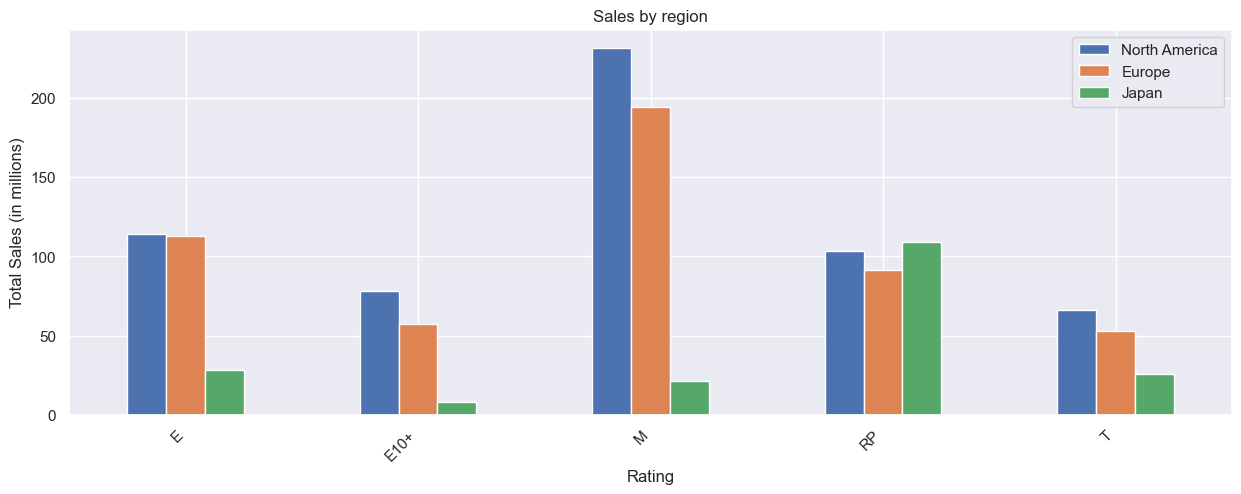

In [149]:
# plotting the sales distribution by region by rating
df_rating_regions_profiles.set_index('rating').plot(
    kind='bar',
    title='Sales by region'
    )
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Rating')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

Once again, North America and Europe are similar while Japan is different, so yes, sales are affected in different regions according to the classification.

---

 ### Hypothesis testing

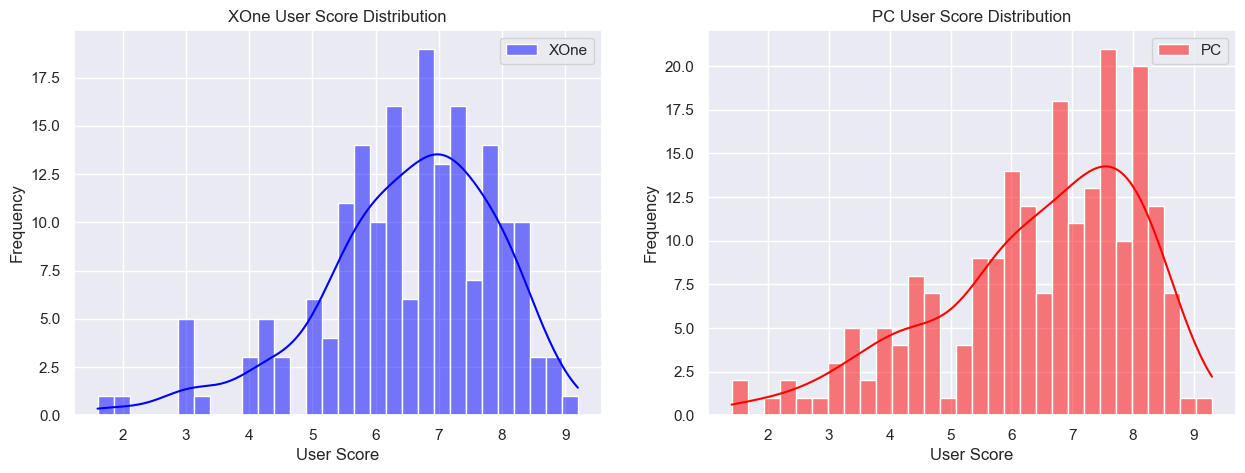

The null hypothesis cannot be rejected. P-value: 0.6206366351489678


In [150]:
# preparing data for the t-test
sample_xone_user_score = df_recent_released.query('user_score >= 0 and platform == "XOne"')['user_score']
sample_pc_user_score = df_recent_released.query('user_score >= 0 and platform == "PC"')['user_score']

alpha = 0.05
# H0: The average user score of XOne and PC platforms are equal
# H1: The average user score of XOne and PC platforms are not equal

# checking the sample distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(sample_xone_user_score, kde=True, color='blue', label='XOne', bins=30)
plt.title('XOne User Score Distribution')
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(sample_pc_user_score, kde=True, color='red', label='PC', bins=30)
plt.title('PC User Score Distribution')
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# checking the t-test
t_test = stats.ttest_ind(sample_xone_user_score, sample_pc_user_score, equal_var=False)

# checking the t-test result
if t_test.pvalue < alpha:
    print(f'The null hypothesis is rejected. P-value: {t_test.pvalue}')
else:
    print(f'The null hypothesis cannot be rejected. P-value: {t_test.pvalue}')

The null hypothesis cannot be rejected, so we have reason to believe that there is a great similarity between the distributions.

---

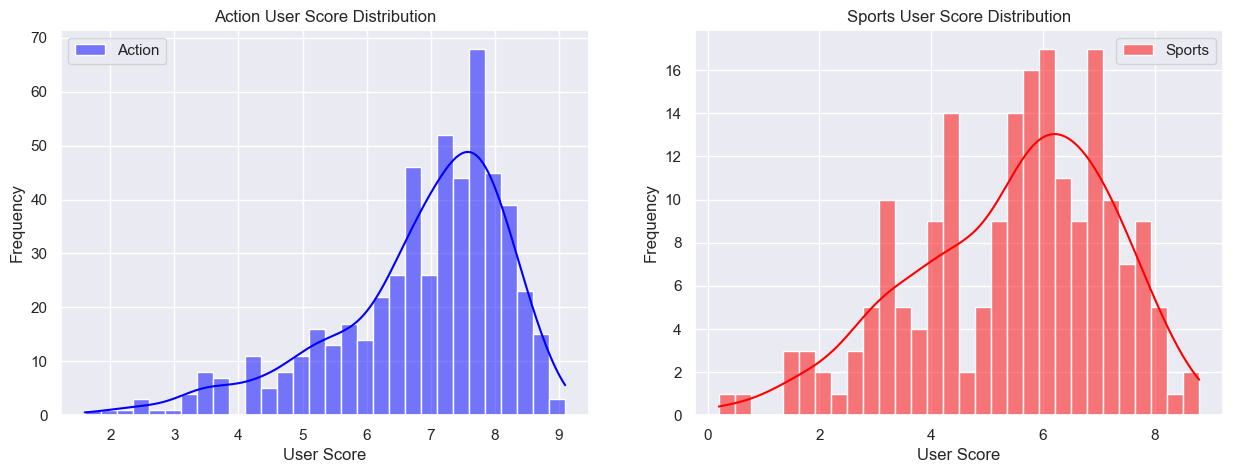

The null hypothesis is rejected. P-value: 2.337200239591976e-20


In [151]:
sample_action_user_score = df_recent_released.query('user_score >= 0 and genre == "Action"')['user_score']
sample_sports_user_score = df_recent_released.query('user_score >= 0 and genre == "Sports"')['user_score']

alpha = 0.05
# H0: The average user score of Action and Sports genres are equal
# H1: The average user score of Action and Sports genres are not equal

# checking the sample distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(sample_action_user_score, kde=True, color='blue', label='Action', bins=30)
plt.title('Action User Score Distribution')
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(sample_sports_user_score, kde=True, color='red', label='Sports', bins=30)
plt.title('Sports User Score Distribution')
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# checking the t-test
t_test = stats.ttest_ind(sample_action_user_score, sample_sports_user_score, equal_var=False)

# checking the t-test result
if t_test.pvalue < alpha:
    print(f'The null hypothesis is rejected. P-value: {t_test.pvalue}')
else:
    print(f'The null hypothesis cannot be rejected. P-value: {t_test.pvalue}')

The null hypothesis was rejected, so we have reason to believe that there is no similarity between the distributions.

---

### Conclusion

During the analysis, we saw that game sales have fallen in recent years on all platforms, but PS4 and X360 lead the way. We noticed that professional reviews are more relevant than user reviews, and that PS4 has a high number of sales of specific games, while on average it is lower than others. The same is true for action games. GTA V is the game with the highest sales volume, surpassing 50 million dollars.

Europe and North America prefer Sony, while Japan prefers Nintendo. Japan also differs from other regions when it comes to genre preference and rating.

We confirmed that the average user ratings for the Xbox One and PC platforms are the same, and the average user ratings for the Action and Sports genres are different, both following an alpha threshold of 5%.

Now we can target advertising campaigns for each region, platform and genre, precisely to reach the right audience and obtain a greater volume of sales.